## Описание проекта

Банк провел телемаркетинговую кампанию по одному из своих финансовых продуктов «Срочные депозиты», чтобы способствовать развитию долгосрочных отношений с существующими клиентами. Набор данных содержит информацию обо всех клиентах, к которым обращались в течение определенного года для открытия срочных депозитных счетов.
Цель состоит в том, чтобы провести EDA на этом наборе данных банковской телемаркетинговой кампании, чтобы сделать вывод о том, где банку следует приложить больше усилий, чтобы повысить уровень положительных ответов.

## Импорт библиотек

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Чтение данных

In [4]:
data = pd.read_csv("bank_data.csv")

D:\Programs\anac\envs\Update_ml\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [6]:
data = pd.read_csv("bank_data.csv", skiprows=2)

In [7]:
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

age, month, response - имеют пустые значения в записях                   
age - можно изменить тип на int                      
jobedu - можно разбить на 2 - job, edu              
customerid - можно сделать его индексом и удалить столбец

## Очистка данных

### Удаление пустых значений и изменение типа столбца возраста

In [9]:
data['age'] = data.age.apply(lambda x: int(x) if not pd.isna(x) else x)

In [10]:
data.age.isnull().sum() / len(data) * 100

0.0442370219636814

In [11]:
data = data.dropna(subset=['age'])

In [12]:
data = data.astype({'age':'int'})

### Добавление столбцов работы и обучения

In [13]:
data['job'] = data.jobedu.apply(lambda x: x.split(',')[0])
data['edu'] = data.jobedu.apply(lambda x: x.split(',')[1])
#data.jobedu[0].split(',')

In [14]:
data.drop(axis=1, columns='jobedu')

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,1,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45208,71,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45209,72,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45210,57,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Изменение уникального идентификатора датафрейма

In [15]:
data.index = data.customerid

In [16]:
data.drop(axis=1, columns='customerid')

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
customerid,,,,,,,,,,,,,,,,,,,,
1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary


### Удаление пустых записей в стоблцах месяца, отклика

In [17]:
data.month.isnull().sum() / len(data) * 100

0.11064149941360005

In [18]:
data.response.isnull().sum() / len(data) * 100

0.06638489964816004

In [19]:
data = data.dropna(subset=['month', 'response'])

In [20]:
data.isna().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
edu           0
dtype: int64

### Проверка столбца платежных дней

In [21]:
data.pdays.describe()

count    45111.000000
mean        40.193323
std        100.094574
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Значение -1 заменяет пустое значение, для анализа и расчетов лучше его заменить на NA.

In [23]:
data.pdays = data.pdays.apply(lambda x: x if x>0 else np.nan)

In [24]:
data.pdays.describe()

count    8239.000000
mean      224.545819
std       115.226203
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Проверка выбросов

Выбросы могут встречаться в столбцах - age, salary, balance,

#### Возраст

In [30]:
data.age.describe()

count    45111.000000
mean        40.938352
std         10.619601
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

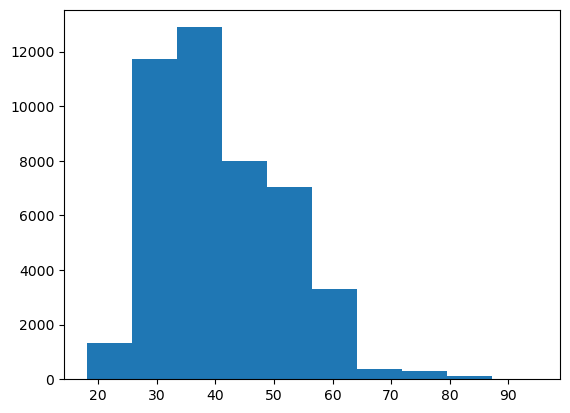

In [29]:
plt.hist(data.age, bins = 10)
plt.show()

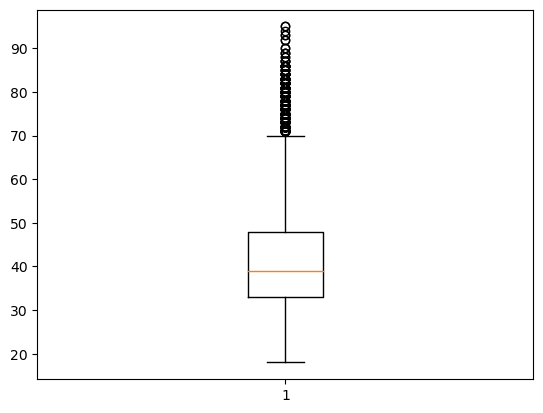

In [31]:
plt.boxplot(data.age)
plt.show()

Максимальный и минимальный возраст реалистичны, поэтому выбросов в данных нет.

#### Зарплата

In [33]:
data.salary.describe()

count     45111.000000
mean      57005.785729
std       32090.324851
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

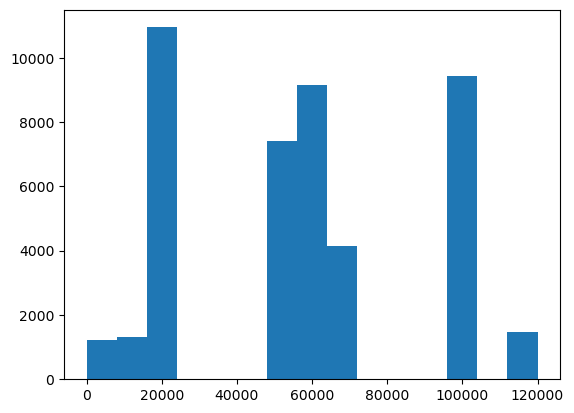

In [38]:
plt.hist(data.salary, bins = 15)
plt.show()

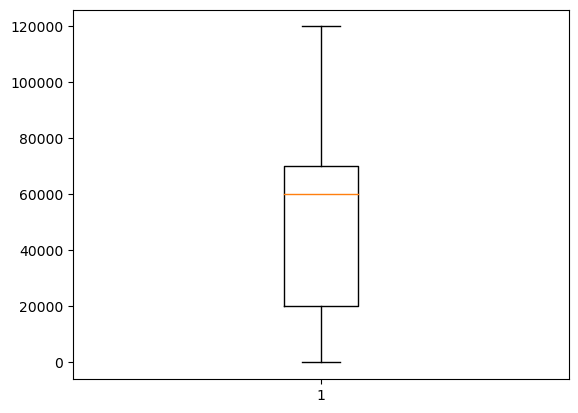

In [35]:
plt.boxplot(data.salary)
plt.show()

Выбросов в зарплатных данных нет.

#### Баланс

In [40]:
data.balance.describe()

count     45111.000000
mean       1362.539647
std        3046.016714
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

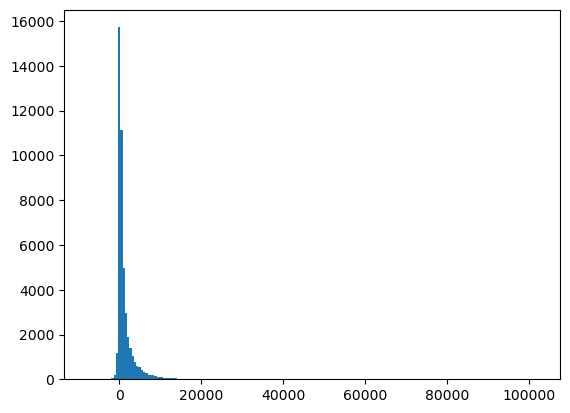

In [214]:
plt.hist(data.balance, bins = 200)
plt.show()

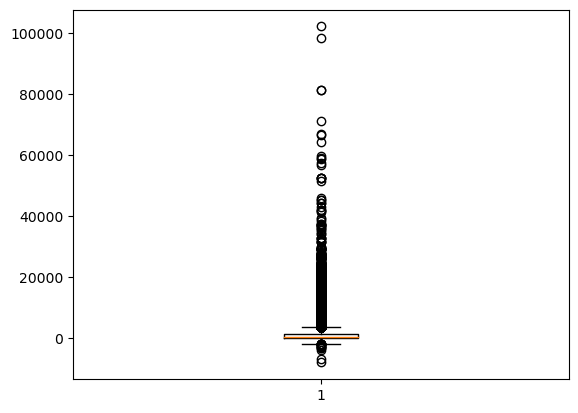

In [44]:
plt.boxplot(data.balance)
plt.show()

In [46]:
data.balance.quantile([0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99])

0.01     -626.9
0.10        0.0
0.30      131.0
0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13164.9
Name: balance, dtype: float64

In [47]:
data[data.balance > 14000].describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,65.000000,392.000000
mean,25472.673469,45.081633,69278.061224,23264.767857,16.176020,2.760204,187.261538,0.515306
std,12150.336066,12.130091,33905.264864,11866.261899,8.068894,3.070135,116.471466,1.707444
min,335.000000,23.000000,0.000000,14004.000000,1.000000,1.000000,31.000000,0.000000
25%,17810.250000,34.000000,50000.000000,16430.000000,9.750000,1.000000,97.000000,0.000000
50%,26431.000000,44.000000,60000.000000,19841.500000,18.000000,2.000000,168.000000,0.000000
75%,34973.250000,55.000000,100000.000000,24802.500000,21.000000,3.000000,245.000000,0.000000
max,45128.000000,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


In [48]:
data[data.balance < - 630].describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,42.000000,445.000000
mean,17360.734831,41.602247,62276.404494,-1024.644944,17.577528,2.896629,268.928571,0.298876
std,11286.471325,8.863657,30456.178912,606.362121,8.475000,3.027370,99.614475,1.667961
min,101.000000,23.000000,4000.000000,-8019.000000,2.000000,1.000000,2.000000,0.000000
25%,7291.000000,35.000000,50000.000000,-1092.000000,11.000000,1.000000,180.750000,0.000000
50%,14933.000000,41.000000,60000.000000,-869.000000,18.000000,2.000000,315.500000,0.000000
75%,25276.000000,49.000000,100000.000000,-725.000000,26.000000,3.000000,345.500000,0.000000
max,40268.000000,60.000000,120000.000000,-631.000000,31.000000,25.000000,364.000000,25.000000


### Преобразование единиц

In [50]:
data.duration.head()

customerid
1    261 sec
2    151 sec
3     76 sec
4     92 sec
5    198 sec
Name: duration, dtype: object

In [51]:
data.duration.describe()

count       45111
unique       2644
top       1.5 min
freq          138
Name: duration, dtype: object

In [53]:
data.duration = data.duration.apply(lambda x: float(x.split(' ')[0])/60 if x.find("sec") > 0 else float(x.split(' ')[0]))

In [54]:
data.duration.describe()

count    45111.000000
mean         4.302710
std          4.291639
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

### Преобразование отклика в числовое значение

In [215]:
data['resp_int'] = data.response.apply(lambda x: 1 if x == 'yes' else 0)

In [208]:
data['resp_int'].value_counts(normalize=True)

0    0.882978
1    0.117022
Name: resp_int, dtype: float64

In [210]:
data['resp_int'].value_counts()

0    39832
1     5279
Name: resp_int, dtype: int64

In [211]:
data['response'].value_counts()

no     39832
yes     5279
Name: response, dtype: int64

## Анализ данных

#### Семейный статус

In [61]:
data.marital.value_counts()

married     27154
single      12762
divorced     5195
Name: marital, dtype: int64

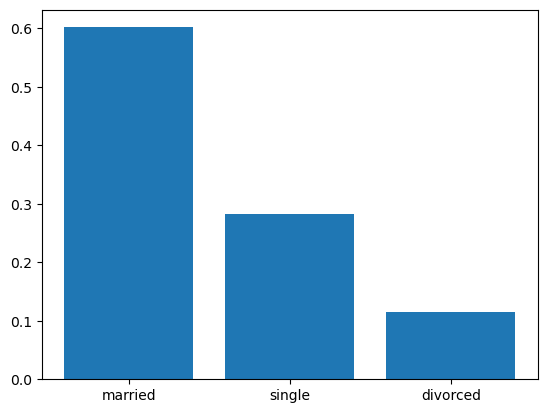

In [244]:
plt.bar(data.marital.value_counts(normalize=True).index, data.marital.value_counts(normalize=True))
plt.show()

Большая часть клиентов находятся в браке.

#### Работа

In [80]:
data.job.value_counts()

blue-collar      9713
management       9442
technician       7581
admin.           5159
services         4142
retired          2258
self-employed    1572
entrepreneur     1483
unemployed       1302
housemaid        1234
student           937
unknown           288
Name: job, dtype: int64

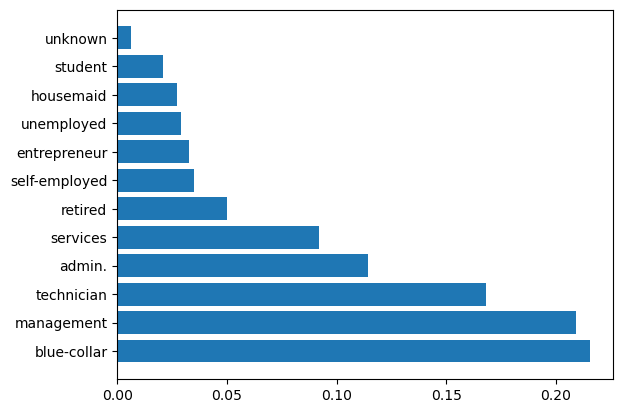

In [243]:
plt.barh(data.job.value_counts(normalize=True).index, data.job.value_counts(normalize=True))
plt.show()

Многие клиенты работают в управлении, технической сфере, предприниматели, рабочий.

#### Образование

In [94]:
data.edu.value_counts()

secondary    23162
tertiary     13268
primary       6830
unknown       1851
Name: edu, dtype: int64

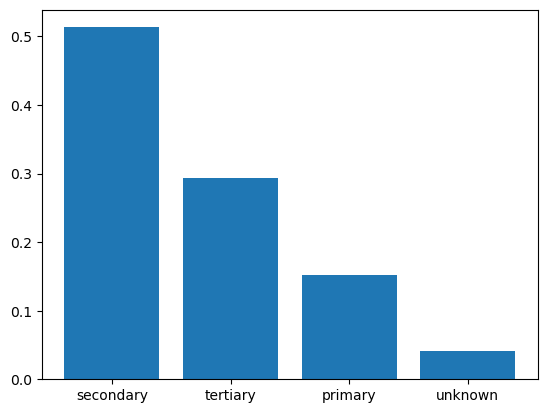

In [242]:
plt.bar(data.edu.value_counts(normalize=True).index, data.edu.value_counts(normalize=True))
plt.show()

Большая часть клиентов с высшим образованием или средним.

#### Результат

In [96]:
data.poutcome.value_counts(normalize=True)

unknown    0.817472
failure    0.108399
other      0.040766
success    0.033362
Name: poutcome, dtype: float64

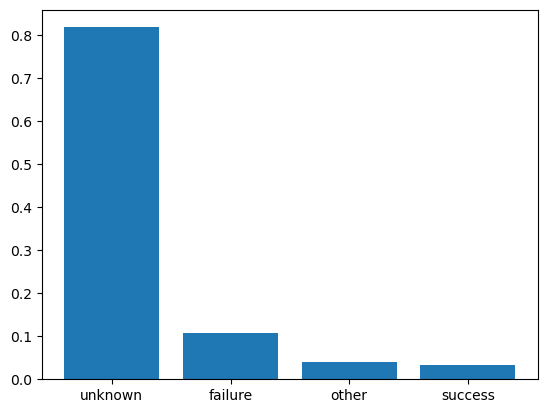

In [241]:
plt.bar(data.poutcome.value_counts(normalize=True).index, data.poutcome.value_counts(normalize=True))
plt.show()

#### Являлись ли целевой аудиторией

In [97]:
data.targeted.value_counts(normalize=True)

yes    0.820509
no     0.179491
Name: targeted, dtype: float64

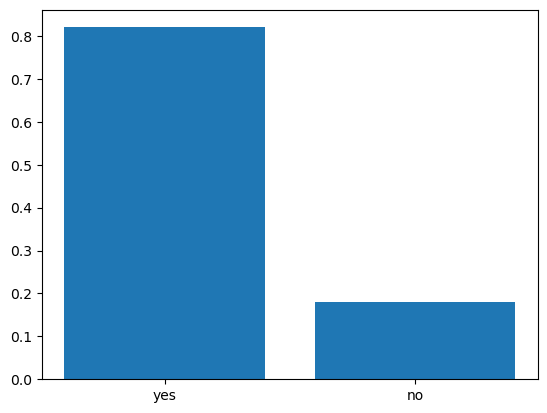

In [240]:
plt.bar(data.targeted.value_counts(normalize=True).index, data.targeted.value_counts(normalize=True))
plt.show()

#### Ответ

In [100]:
data.response.value_counts(normalize=True)

no     0.882978
yes    0.117022
Name: response, dtype: float64

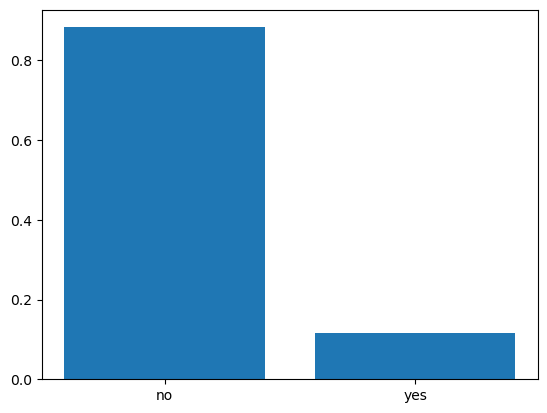

In [239]:
plt.bar(data.response.value_counts(normalize=True).index, data.response.value_counts(normalize=True))
plt.show()

#### Зависимость баланса, зарплаты и возраста

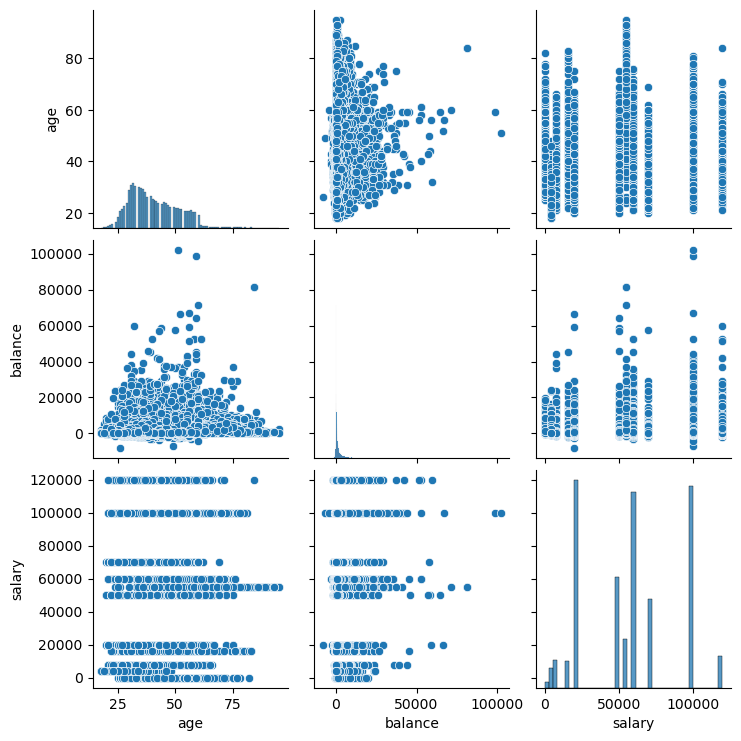

In [111]:
sns.pairplot(data, vars=['age', 'balance', 'salary'])

<AxesSubplot:>

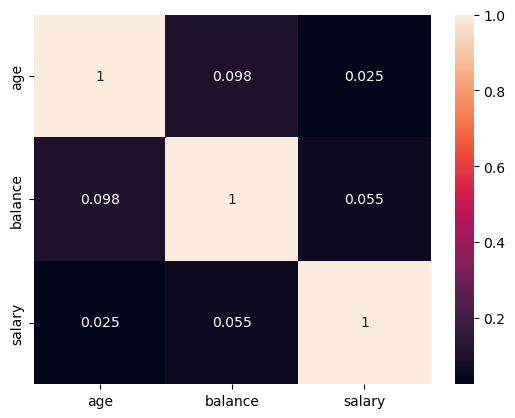

In [115]:
sns.heatmap(data[['age', 'balance', 'salary']].corr(), annot=True)

Возраст, баланс и зарплата не имеют зависимости между собой.

#### Зависимость длительности разговора о предложении от их результата

In [238]:
data.groupby('poutcome')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
poutcome,,,,,,,,
failure,4890.0,4.066810,3.783921,0.083333,1.750000,2.950000,5.000000,36.983333
other,1839.0,4.263893,4.123759,0.066667,1.650000,3.050000,5.500000,34.216667
success,1505.0,5.277364,3.951277,0.016667,2.766667,4.216667,6.466667,34.366667
unknown,36877.0,4.296150,4.370564,0.000000,1.683333,2.950000,5.300000,81.966667


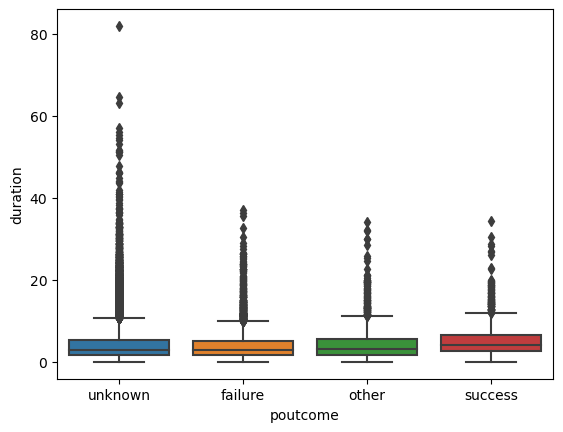

In [246]:
sns.boxplot(data=data, x='poutcome', y='duration')
plt.show()

<BarContainer object of 4 artists>

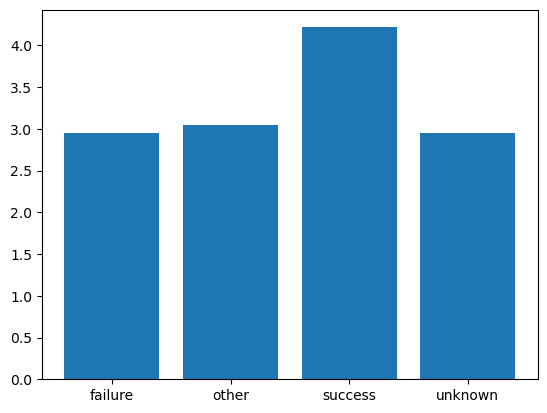

In [252]:
plt.bar(data.groupby('poutcome')['duration'].median().index, data.groupby('poutcome')['duration'].median())

Нельзя сделать вывод, что длительность влияет на результат предложения.

#### Взаимосвязи с ответом:

In [255]:
##### Возраст и ответ:

In [256]:
data.groupby('response')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,39832.0,40.841635,10.172859,18.0,33.0,39.0,48.0,95.0
yes,5279.0,41.668119,13.501607,18.0,31.0,38.0,50.0,95.0


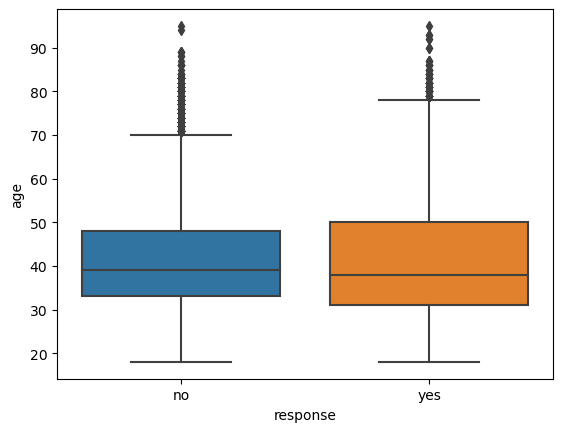

In [254]:
sns.boxplot(data=data, x='response', y='age')
plt.show()

In [301]:
data["age_str"] = data.age.apply(lambda x: "0<30" if x<30 else ("30-39" if x<40 else ("40-49" if x<50 else ("50-59" if x<60 else ("60-69" if x<70 else ("70-79" if x<80 else ("80-89" if x<90 else ("90-99" if x<100 else np.NAN))))))))

In [302]:
data["age_str"].value_counts()

30-39    18041
40-49    11635
50-59     8392
0<30      5261
60-69     1229
70-79      423
80-89      121
90-99        9
Name: age_str, dtype: int64

In [303]:
data.groupby('age_str')['resp_int'].mean()

age_str
0<30     0.176012
30-39    0.105870
40-49    0.091276
50-59    0.093065
60-69    0.296989
70-79    0.425532
80-89    0.396694
90-99    0.777778
Name: resp_int, dtype: float64

<BarContainer object of 8 artists>

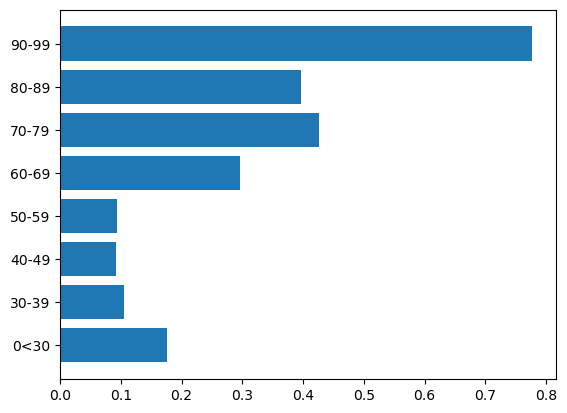

In [304]:
plt.barh(data.groupby('age_str')['resp_int'].mean().index, data.groupby('age_str')['resp_int'].mean())

Можно сделать вывод, что на предложение намного чаще соглашались люди старше 70.

##### Зарплата и ответ:

In [274]:
data.groupby('response')['salary'].mean()

response
no     56771.917052
yes    58770.411063
Name: salary, dtype: float64

In [275]:
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

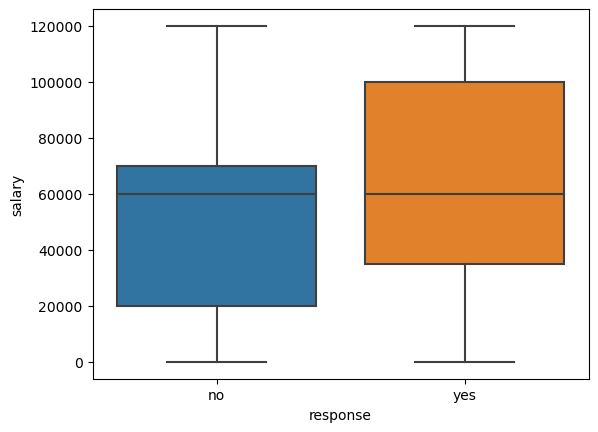

In [276]:
sns.boxplot(data=data, x='response', y='salary')
plt.show()

Люди с более высокой зарплатой чаще соглашались.

##### Баланс и ответ:

In [277]:
data.groupby('response')['balance'].mean()

response
no     1303.851376
yes    1805.364274
Name: balance, dtype: float64

In [278]:
data.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

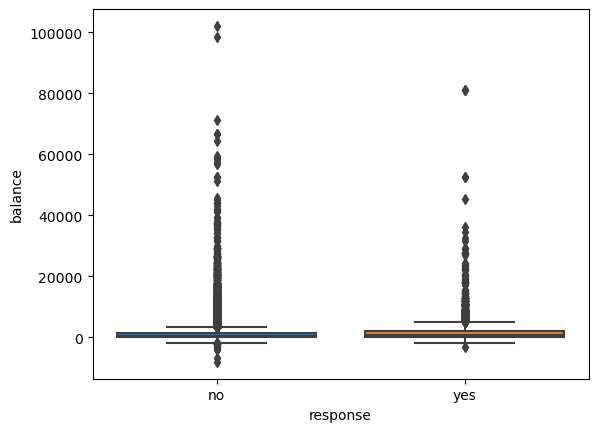

In [279]:
sns.boxplot(data=data, x='response', y='balance')
plt.show()

##### Работа и ответ:

In [280]:
data.groupby('job')['resp_int'].mean()

job
admin.           0.122117
blue-collar      0.072892
entrepreneur     0.082940
housemaid        0.086710
management       0.137577
retired          0.228078
self-employed    0.117684
services         0.088846
student          0.287086
technician       0.110671
unemployed       0.155146
unknown          0.118056
Name: resp_int, dtype: float64

<BarContainer object of 12 artists>

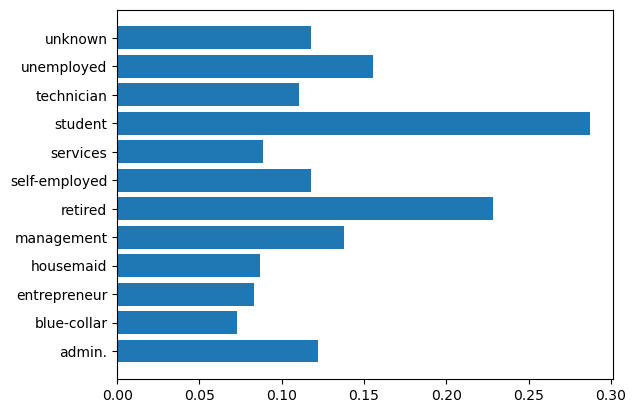

In [281]:
plt.barh(data.groupby('job')['resp_int'].mean().index, data.groupby('job')['resp_int'].mean())

Самозанятые, уволенные, домохозяйки чаще соглашались на предложение.

##### Образование и ответ:

In [282]:
data.groupby('edu')['resp_int'].mean()

edu
primary      0.086384
secondary    0.105647
tertiary     0.149985
unknown      0.136143
Name: resp_int, dtype: float64

<BarContainer object of 4 artists>

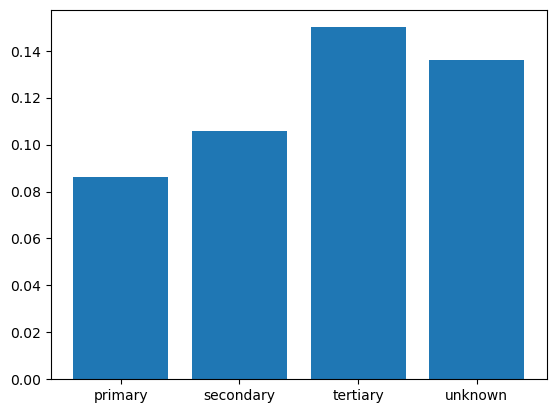

In [283]:
plt.bar(data.groupby('edu')['resp_int'].mean().index, data.groupby('edu')['resp_int'].mean())

Клиенты с высшим и без/неизвестным образованием соглашались чаще остальных.

##### Семейное положение и ответ:

In [284]:
data.groupby('marital')['resp_int'].mean()

marital
divorced    0.119346
married     0.101311
single      0.149506
Name: resp_int, dtype: float64

<BarContainer object of 3 artists>

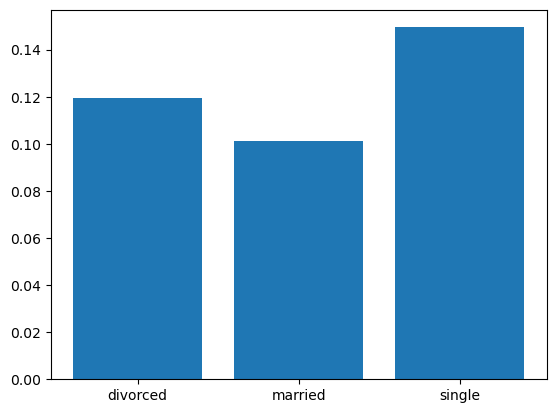

In [285]:
plt.bar(data.groupby('marital')['resp_int'].mean().index, data.groupby('marital')['resp_int'].mean())

Люди без семейного положения и разведенные чаще соглашались.

##### Кредиты и ответ:

In [286]:
data.groupby('loan')['resp_int'].mean()

loan
no     0.126567
yes    0.066980
Name: resp_int, dtype: float64

<BarContainer object of 2 artists>

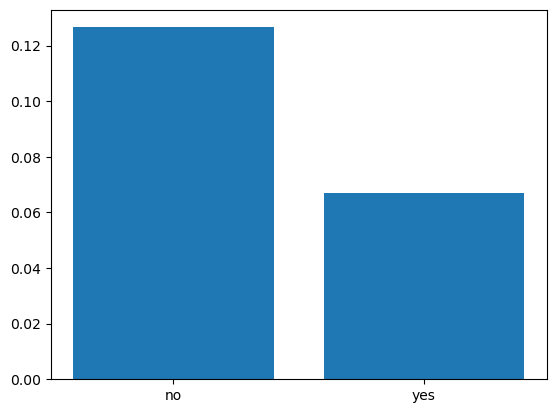

In [287]:
plt.bar(data.groupby('loan')['resp_int'].mean().index, data.groupby('loan')['resp_int'].mean())

Люди без кредитов чаще соглашались.

##### Владение недвижимостью и ответ:

In [288]:
data.groupby('housing')['resp_int'].mean()

housing
no     0.167008
yes    0.077064
Name: resp_int, dtype: float64

<BarContainer object of 2 artists>

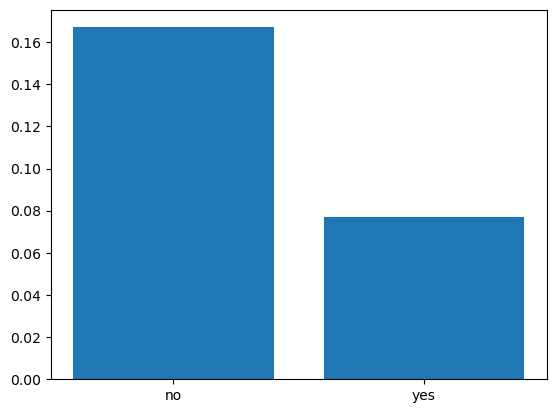

In [289]:
plt.bar(data.groupby('housing')['resp_int'].mean().index, data.groupby('housing')['resp_int'].mean())

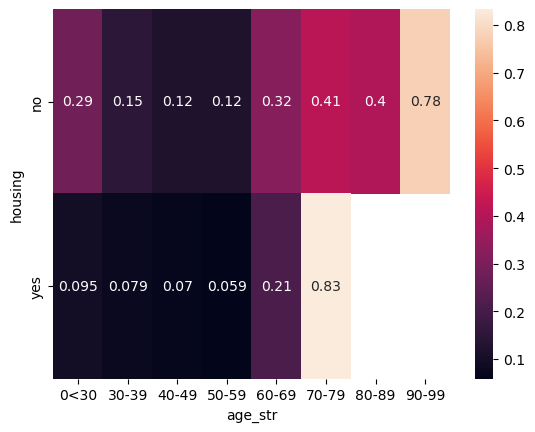

In [312]:
res = pd.pivot_table(data, index='housing', columns='age_str', values='resp_int')
sns.heatmap(res, annot = True)
plt.show()

Люди без недвижимости соглашались в чаще.

#### Влияние семейного положения, учебы на ответ:

In [290]:
res = pd.pivot_table(data, index = 'edu', columns = 'marital', values = 'resp_int')
res

marital,divorced,married,single
edu,,,
primary,0.139037,0.075703,0.105758
secondary,0.103240,0.094718,0.129408
tertiary,0.137509,0.129735,0.183588
unknown,0.142012,0.122944,0.163188


<AxesSubplot:xlabel='marital', ylabel='edu'>

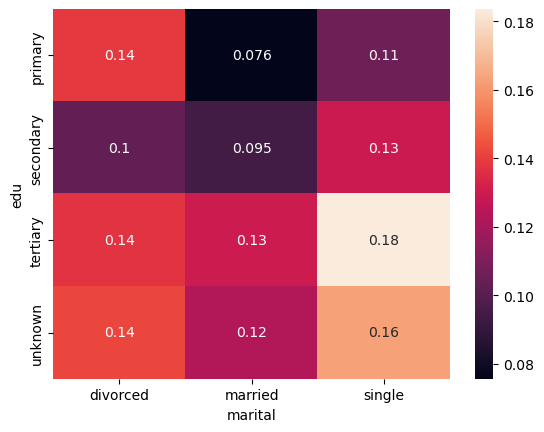

In [291]:
sns.heatmap(res, annot = True)

Клиенты без семейного положения с высшим более предпочтительны для предложения. Следующие - без семейного и с неуказанным образованием, разведенные с любым образованием, кроме среднего.

#### Влияние семейного положения и возраста:

In [306]:
res = pd.pivot_table(data, index = 'age_str', columns = 'marital', values = 'resp_int')
res

marital,divorced,married,single
age_str,,,
0<30,0.111111,0.089066,0.209468
30-39,0.105474,0.092657,0.125317
40-49,0.100517,0.082392,0.125526
50-59,0.101608,0.090577,0.097426
60-69,0.350000,0.291708,0.208333
70-79,0.481928,0.421212,0.100000
80-89,0.342857,0.409639,0.666667
90-99,0.750000,0.800000,NaN


<AxesSubplot:xlabel='marital', ylabel='age_str'>

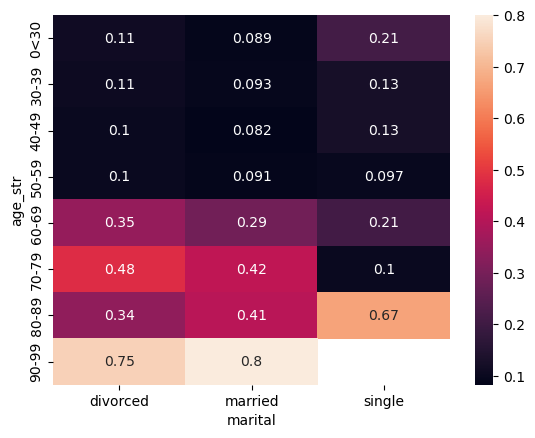

In [307]:
sns.heatmap(res, annot = True)

Клиенты старше 90 часто соглашались на срочный депозит вне зависимости от семейного положения. Люди без семейного положения чаще других соглашались в возрасте 80-89. Разведенные клиенты 70-79 лет соглашались в 50% случаях.

#### Влияение возраста и семейного положения на ответ:

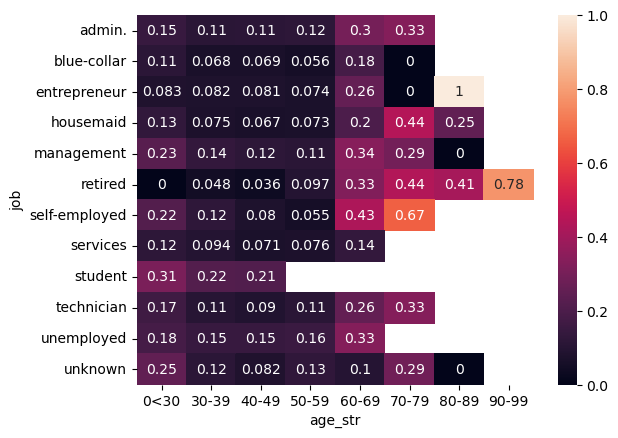

In [309]:
res = pd.pivot_table(data, index='job', columns='age_str', values='resp_int')
sns.heatmap(res, annot = True)
plt.show()

На графике можно заметить, что люди старше 60 намного чаще брали депозит, почти не зависимо от работы. Также студенты любого возраста брали в 1 из 5 случаев. Молодые люди до 30 лет, работающие на себя, в управлении или решающие не указывать, также в 1 из 5 случаев берут депозит. 

#### Влияение работы и семейного положения на ответ:

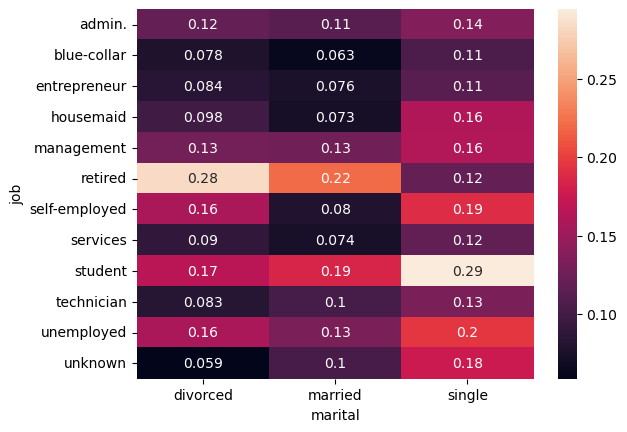

In [292]:
res = pd.pivot_table(data, index='job', columns='marital', values='resp_int')
sns.heatmap(res, annot = True)
plt.show()

Студенты без семейного положения и уволившиеся разведенные клиенты намного чаще соглашались. Далее предпочтительными по соглашению будут клиенты в браке, но уволенные. Студенты, неработающие, управляющие и администраторы соглашались намного лучше вне зависимости от их семейного положения.

#### Влияение образования, возраста на отклик

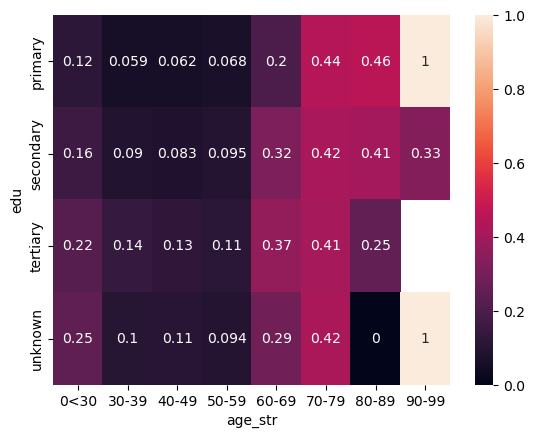

In [313]:
res = pd.pivot_table(data, index='edu', columns='age_str', values='resp_int')
sns.heatmap(res, annot = True)
plt.show()

Клиенты с высшим образованием до 70 лет чаще берут депозит, чем другие в этом возрасте. Также видна тенденция, что после 60 лет люди намного чаще соглашаются на предложение. 

#### Влияение образования, результата переговоров на отклик

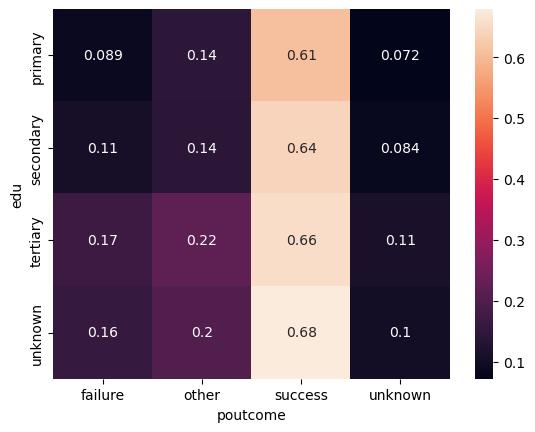

In [295]:
res = pd.pivot_table(data, index='edu', columns='poutcome', values='resp_int')
sns.heatmap(res, annot = True)
plt.show()

Если переговоры были успешные, то клиент часто соглашался на предложение в итоге.

## Выводы:

В ходе анализа получили следующие выводы:
<li>После 60 лет повышается количество взявших депозит.</li>
<li>Так же целевыми клиентами являются студенты, молодые люди до 30 лет.</li>
<li>Люди без недвижимости соглашаются чаще</li>
<li>Высшее образование повышает шанс клиента взять депозит, но возраст влияет сильно.</li>
<li>Менеджеры, студенты, уволившиеся чаще других рабочих берут депозит.</li>
<li>Длительность предложения не влияет на его результат.</li>
Банк может сосредоточиться на целевых клиентах и чаще предлагать им депозит.